### Name: Neel Narvekar 
### Roll No.: 49
### PID: 246041
### Date: 23/02/2026
### Subject: ML
## Title:Expt.-6: Classification of Credit Card Default Risk using Support Vector Machine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [27]:
data=pd.read_csv("credit.csv", skiprows=1)
data=data.sample(3000, random_state=42)

print(data.columns)

data.drop(columns=['ID'], inplace=True)
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [28]:
data.head()


,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2308,30000,1,2,2,25,0,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
22404,150000,2,1,2,26,0,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
23397,70000,2,3,1,32,0,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
25058,130000,1,3,2,49,0,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
2664,50000,2,2,2,36,0,0,0,0,0,...,19574,20295,19439,2000,1500,1000,1800,0,1000,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 2308 to 8485
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   3000 non-null   int64
 1   GENDER                      3000 non-null   int64
 2   EDUCATION                   3000 non-null   int64
 3   MARRIAGE                    3000 non-null   int64
 4   AGE                         3000 non-null   int64
 5   PAY_0                       3000 non-null   int64
 6   PAY_2                       3000 non-null   int64
 7   PAY_3                       3000 non-null   int64
 8   PAY_4                       3000 non-null   int64
 9   PAY_5                       3000 non-null   int64
 10  PAY_6                       3000 non-null   int64
 11  BILL_AMT1                   3000 non-null   int64
 12  BILL_AMT2                   3000 non-null   int64
 13  BILL_AMT3                   3000 non-null   int64
 14  BILL_AMT4 

In [30]:
data.sum


<bound method DataFrame.sum of        LIMIT_BAL  GENDER  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2308       30000       1          2         2   25      0      0      0   
22404     150000       2          1         2   26      0      0      0   
23397      70000       2          3         1   32      0      0      0   
25058     130000       1          3         2   49      0      0      0   
2664       50000       2          2         2   36      0      0      0   
...          ...     ...        ...       ...  ...    ...    ...    ...   
21481     400000       2          1         2   29     -1     -1     -1   
26178     150000       2          1         2   28      0      0      0   
27445      80000       1          1         2   33      0      0      0   
1723      160000       2          1         2   27      0      0     -2   
8485       30000       2          2         2   41      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1 

In [31]:
data.isnull().sum()

LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [32]:
y= data['default payment next month']

x=data[['BILL_AMT1','BILL_AMT2']]

print(x.dtypes)
print(x.head())

BILL_AMT1    int64
BILL_AMT2    int64
dtype: object
       BILL_AMT1  BILL_AMT2
2308        8864      10062
22404     136736     125651
23397      70122      69080
25058      20678      18956
2664       94228      47635


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [34]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
models={
    "Linear SVM":SVC(kernel='linear', C=1, class_weight='balanced'),
    "Ploynomial SVM": SVC(kernel='poly',
                          degree=2,
                          C=1,
                          gamma='scale',
                          class_weight='balanced'),
    "RBF SVM": SVC(kernel='rbf',
                   C=5,
                   gamma=0.1,
                   class_weight='balanced')
}

In [36]:
for name,model in models.items():
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)

    print("\n", name)
    print("Train Accuracy:\n",accuracy_score(y_train, y_pred_train))
    print("test accuracy:\n",accuracy_score(y_test, y_pred))      
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred,zero_division=0))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


 Linear SVM
Train Accuracy:
 0.2819047619047619
test accuracy:
 0.23777777777777778
Confusion Matrix:
 [[ 48 674]
 [ 12 166]]
Precision: 0.1976190476190476
Recall: 0.9325842696629213
F1 Score: 0.32612966601178783

 Ploynomial SVM
Train Accuracy:
 0.24904761904761905
test accuracy:
 0.21
Confusion Matrix:
 [[ 13 709]
 [  2 176]]
Precision: 0.19887005649717515
Recall: 0.9887640449438202
F1 Score: 0.33113828786453436

 RBF SVM
Train Accuracy:
 0.34476190476190477
test accuracy:
 0.3111111111111111
Confusion Matrix:
 [[126 596]
 [ 24 154]]
Precision: 0.20533333333333334
Recall: 0.8651685393258427
F1 Score: 0.33189655172413796


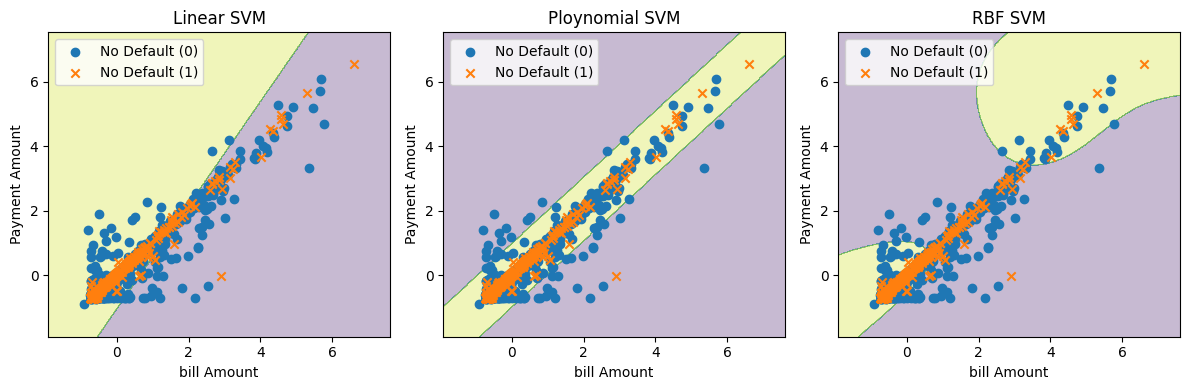

In [37]:
    def plot_boundary(model,title):
        h=0.02
        x_min, x_max = x_train[:,0].min()-1,x_train[:,0].max()+1
        y_min, y_max = x_train[:,1].min()-1,x_train[:,1].max()+1
    
        xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
        )
    
        z=model.predict(np.c_[xx.ravel(), yy.ravel()])
        z=z.reshape(xx.shape)
    
        plt.contourf(xx, yy, z, alpha=0.3)
        plt.scatter(x_train[y_train==0, 0],
                    x_train[y_train==0,1],
        label='No Default (0)',
        marker='o')
    
        plt.scatter(x_train[y_train==1, 0],
                    x_train[y_train==1,1],
        label='No Default (1)',
        marker='x')
    
        plt.legend()
        plt.title(title)
        plt.xlabel("bill Amount")
        plt.ylabel("Payment Amount")

    plt.figure(figsize=(12,4))
    
    for i, (name,model) in enumerate(models.items()):
        plt.subplot(1,3, i+1)
        model.fit(x_train, y_train)
        plot_boundary(model, name)
    
    plt.tight_layout()
    plt.show()